In [601]:
import numpy as np
import matplotlib.pyplot as plt

## Simple LM model

In [602]:
def min_sq(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot(y - y_bar, x - x_bar) / np.linalg.norm(x - x_bar)**2
    beta_0 = y_bar - beta_1 * x_bar
    return [beta_1, beta_0]

In [603]:
np.random.seed(91)
N = 100

a = np.random.normal(loc=2, scale=1, size=N)
b = np.random.randn(1)
x = np.random.randn(N)
y = a * x + b + np.random.randn(N)

a1, b1 = min_sq(x, y)
print(a1, b)

2.203817943318935 [-0.6781313]


In [604]:
xx = x - np.mean(x)
yy = y - np.mean(y)

a2, b2 = min_sq(xx, yy)
print(a2, b2)

2.203817943318935 2.936254619112371e-17


In [605]:
x_seq = np.arange(-5, 5, 0.1)
y_pre = b1 + x_seq * a1
yy_pre = b2 + x_seq * a2

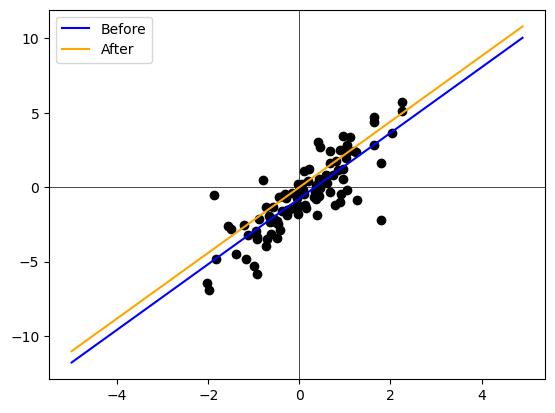

In [606]:
plt.scatter(x, y, c='black')
plt.axhline(y=0, c='black', linewidth=0.5)
plt.axvline(x=0, c='black', linewidth=0.5)
plt.plot(x_seq, y_pre, c='blue', label='Before')
plt.plot(x_seq, yy_pre, c='orange', label='After')
plt.legend(loc='upper left')

## Multiple Regression

In [607]:
N = 100
p = 2
beta = np.array([1, 2, 3])
x = np.random.randn(N, p)
y = beta[0] + beta[1] * x[:, 0] + beta[2] * x[:, 1] + np.random.randn(N)
X = np.insert(x, 0, 1, axis=1)

np.linalg.inv(X.T@X)@X.T@y

array([0.90278533, 1.7945634 , 2.99273718])

## Distributions

In [608]:
import scipy as sc

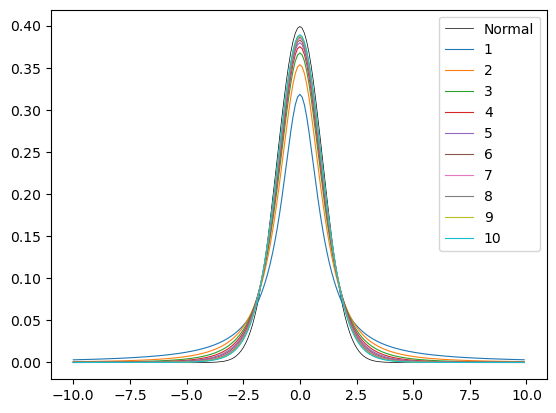

In [609]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, sc.stats.norm.pdf(x, 0, 1), label='Normal', color='black', linewidth=0.5)
for i in range(1, 11):
    plt.plot(x, sc.stats.t.pdf(x, i), label='{}'.format(i), linewidth=0.8)

plt.legend(loc='upper right')

Text(0, 0.5, 'beta_1')

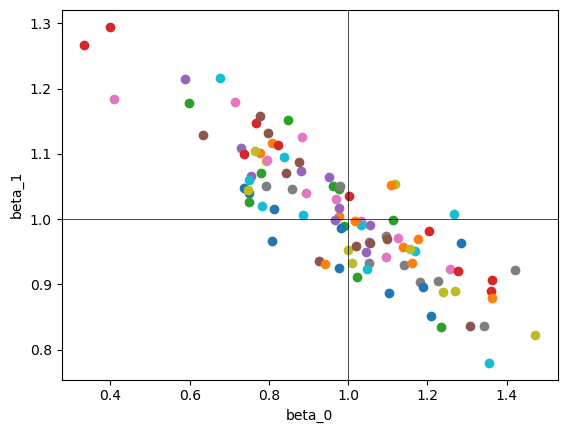

In [610]:
n = 100
p = 1
x_1 = np.zeros(100)
x_2 = np.zeros(100)

for i in range(100):
    x = np.random.randn(n) + 2
    e = np.random.randn(n)
    y = x + 1 + e
    b_1, b_0 = min_sq(x, y)
    x_1[i] = b_0
    x_2[i] = b_1
    plt.scatter(b_0, b_1)

plt.axhline(y=1, c='black', linewidth=0.5)
plt.axvline(x=1, c='black', linewidth=0.5)
plt.xlabel('beta_0')
plt.ylabel('beta_1')


In [611]:
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.87431835],
       [-0.87431835,  1.        ]])

## Hypothesis Testing

$$
H_0 : \beta_i = 0
\\
H_1 : \beta_i \neq 0
$$

$\alpha = 0.05$

In [615]:
n = 100

x = np.random.randn(n)
y = np.random.randn(n)
beta_1, beta_0 = min_sq(x, y)

X = np.insert(x.reshape((n, 1)), 0, 1, axis=1)

RSS = np.linalg.norm(y - x*b_1 + beta_0)**2
var = (RSS / (n - p - 1)) * np.linalg.inv(X.T@X)
se_0 = np.sqrt(var[0, 0])
se_1 = np.sqrt(var[1, 1])

t_0 = beta_0 / se_0
t_1 = beta_1 / se_1

p_0 = 2 * (1 - sc.stats.t.cdf(np.abs(t_0), n - p - 1))
p_1 = 2 * (1 - sc.stats.t.cdf(np.abs(t_1), n - p - 1))

In [618]:
beta_0, se_0, t_0, p_0

(np.float64(-0.017504053478309453),
 np.float64(0.1547853418394129),
 np.float64(-0.1130859890884862),
 np.float64(0.9101937162502196))

In [619]:
beta_1, se_1, t_1, p_1

(np.float64(0.0835221287003772),
 np.float64(0.15156268382766033),
 np.float64(0.5510731704602762),
 np.float64(0.5828377131587772))